In [26]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [27]:
device

'cuda'

In [28]:
dataset = datasets.ImageFolder(root="/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0")

dataset.classes

['all', 'hem']

In [29]:
dataset = datasets.ImageFolder(root="/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0")


In [30]:
len(dataset)

3527

In [31]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0452, 0.0196, 0.0516], 
                        std = [0.1009, 0.0449, 0.1151])
])

In [32]:
root_dir_0 = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0"
root_dir_1 = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1"
root_dir_2 = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2"

In [33]:
dataset_0 = datasets.ImageFolder(root=root_dir_0, transform=transform)
dataset_1 = datasets.ImageFolder(root=root_dir_1, transform=transform)
dataset_2 = datasets.ImageFolder(root=root_dir_2, transform=transform)

data = ConcatDataset([dataset_0, dataset_1, dataset_2])

class_names = dataset_0.classes

In [34]:
# list
class_names

['all', 'hem']

In [84]:
from torch.utils.data import random_split
import torch

train_ratio = 0.8

generator = torch.Generator(device=device)

# generator = torch.Generator(device="cpu")

train_data, test_data = random_split(data, [train_ratio, 1-train_ratio], generator=generator)

In [85]:
len(train_data), len(test_data)

(8529, 2132)

In [86]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=torch.Generator(device=device))
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, generator=torch.Generator(device=device))

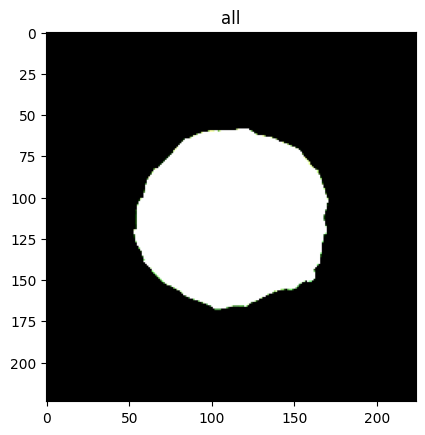

In [87]:
import numpy as np
img, label = train_data[3300]
image = np.array(img)
# pytorch order -> matplotlib order 
image = image.transpose((1, 2, 0))
plt.title(class_names[label])
plt.imshow(image)

In [39]:
means = []
stds = []
for img, _ in train_data:
    means.append(torch.mean(img, [1, 2]).tolist())
    stds.append(torch.std(img, [1, 2]).tolist())

mean = torch.mean(torch.tensor(means), [0])
std = torch.mean(torch.tensor(stds), [0])

mean, std

(tensor([-0.0005, -0.0007,  0.0002], device='cuda:0'),
 tensor([1.0003, 0.9989, 0.9998], device='cuda:0'))

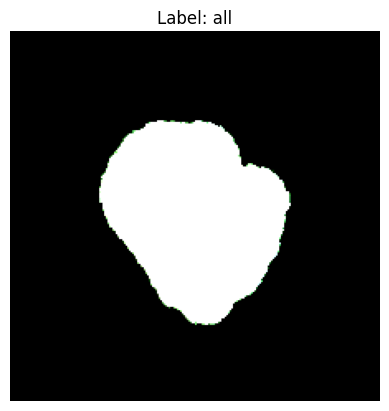

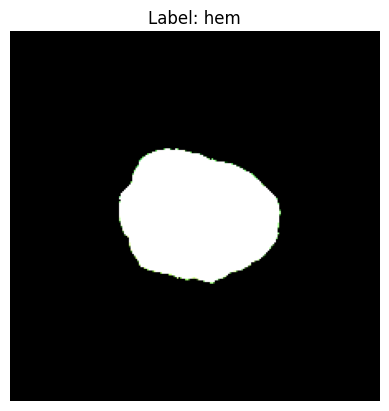

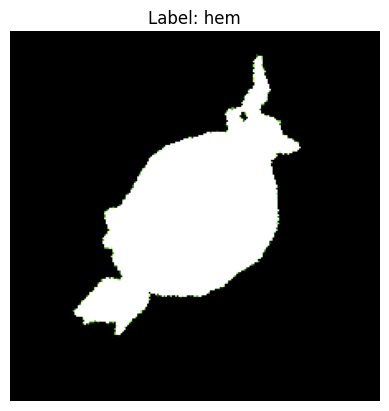

In [40]:
for i in range(3): 
    img, label = train_data[i]
    
    img = img.numpy()

   
    img = img.transpose((1, 2, 0))

    plt.imshow(img)
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')
    plt.show()

In [41]:
train_data[0][0].shape

torch.Size([3, 224, 224])

In [42]:
# Вихідна ширина = (вхідна ширина - фільтрована ширина + 1) // крок
# Вихідна висота = (вхідна висота - висота фільтра + 1) // крок

In [43]:
# from torch import nn 
# import torch.nn.functional as F
# import numpy as np

# class ConvNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
# #         128, 128, 3
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3)
# #         126, 126, 6
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3)
# #          124, 124, 12
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
# #          62, 62, 12
#         self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
# #          60, 60, 24
#         self.conv4 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3)
# #          58, 58, 48
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
# #          29, 29, 48
#         self.conv5 = nn.Conv2d(in_channels=48, out_channels=48, kernel_size=2)
# #          28, 28, 48
#         self.conv6 = nn.Conv2d(in_channels=48, out_channels=48, kernel_size=3)
# #          26, 26, 48
#         self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
# #          13, 13, 48
#         self.conv7 = nn.Conv2d(in_channels=48, out_channels=48, kernel_size=2)
# #          12, 12, 48
#         self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
# #           6, 6, 48
#         self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
# #           3, 3, 48 
#         self.conv8 = nn.Conv2d(in_channels=48, out_channels=48, kernel_size=2)
# #           2, 2, 48 
    
# #         192
#         self.flatten = nn.Flatten()
#         self.linear1 = nn.Linear(in_features=192, out_features=150)
#         self.bnorm1 = nn.BatchNorm1d(num_features=150)
#         self.linear2 = nn.Linear(in_features=150, out_features=100)
#         self.drop1 = nn.Dropout(0.3)
#         self.linear3 = nn.Linear(in_features=100, out_features=60)
#         self.linear4 = nn.Linear(in_features=60, out_features=30)
#         self.linear5 = nn.Linear(in_features=30, out_features=18)
#         self.linear6 = nn.Linear(in_features=18, out_features=10)
#         self.linear7 = nn.Linear(in_features=10, out_features=4)
#         self.linear8 = nn.Linear(in_features=4, out_features=2)
        
        

#     def forward(self, x):
#         out = self.conv1(x)
#         out = F.relu(out)
#         out = self.conv2(out)
#         out = F.relu(out)
#         out = self.pool1(out)
#         out = F.relu(out)
#         out = self.conv3(out)
#         out = F.relu(out)
#         out = self.conv4(out)
#         out = F.relu(out)
#         out = self.pool2(out)
#         out = F.relu(out)
#         out = self.conv5(out)
#         out = F.relu(out)
#         out = self.conv6(out)
#         out = F.relu(out)
#         out = self.pool3(out)
#         out = F.relu(out)
#         out = self.conv7(out)
#         out = F.relu(out)
#         out = self.pool4(out)
#         out = F.relu(out)
#         out = self.pool5(out)
#         out = F.relu(out)
#         out = self.conv8(out)
        
#         out = self.flatten(out)
#         out = self.linear1(out)
#         out = self.bnorm1(out)
#         out = F.relu(out)
#         out = self.linear2(out)
#         out = F.relu(out)
#         out = self.drop1(out)
#         out = self.linear3(out)
#         out = F.relu(out)
#         out = self.linear4(out)
#         out = F.relu(out)
#         out = self.linear5(out)
#         out = F.relu(out)
#         out = self.linear6(out)
#         out = F.relu(out)
#         out = self.linear7(out)
#         out = F.relu(out)
#         out = self.linear8(out)
# #         out = F.sigmoid(out)


        
    
        
#         return out 
    
#     def predict(self, X, device='cpu'):
        
#         loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data))
#         X_test, y_test = next(iter(loader))
# #         X = torch.FloatTensor(np.array(X)).to(device)

#         with torch.no_grad():
#             y_pred = F.softmax(self.forward(X), dim=-1)

#         return y_pred.cpu().numpy()
 
    
    

# model = ConvNetwork()
# model.to(device)
     
       
        
    

In [44]:
import torch
from torchvision import models


model = models.resnet50(pretrained=True)

In [45]:
!pip install -q torchsummary

In [46]:
from torchsummary import summary 

In [47]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [88]:
from torch import nn 
import torch.nn.functional as F
import numpy as np

class CustomNN(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        
#         self.resnet = model

        resnet = models.resnet50(pretrained=True)
        
        for param in resnet.parameters():
            param.requires_grad = False
        
        in_features = resnet.fc.in_features
        
        resnet.fc = nn.Identity()
        
        self.trained_model = resnet
        
#        2048, 1, 1

        self.flatten1 = nn.Flatten()
        self.dropout1 = nn.Dropout(0.3)
        self.linear1 = nn.Linear(in_features = 2048, out_features = 1024)
        self.linear2 = nn.Linear(in_features = 1024, out_features = 512)
        self.bnorm1 = nn.BatchNorm1d(512)
        self.linear3 = nn.Linear(in_features = 512, out_features = 256)
        
        self.bnorm2 = nn.BatchNorm1d(256)
        
        self.linear4 = nn.Linear(in_features = 256, out_features = 128)
        self.dropout2 = nn.Dropout(0.2)
        self.linear5 = nn.Linear(in_features = 128, out_features = 64)
        self.bnorm3 = nn.BatchNorm1d(64)
        self.linear6 = nn.Linear(in_features = 64, out_features = 32)
        self.linear7 = nn.Linear(in_features = 32, out_features = 16)
        self.linear8 = nn.Linear(in_features = 16, out_features = 8)
        self.linear9 = nn.Linear(in_features = 8, out_features = num_classes)
        
        
    def forward(self, x):
        out = self.trained_model(x)
        
#         out = self.flatten1(out)
#         out = self.dropout1(out)
        out = self.linear1(out)
        out = self.dropout1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.bnorm1(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.bnorm2(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.dropout2(out)
        out = self.linear5(out)
        out = F.relu(out)
        out = self.bnorm3(out)
        out = self.linear6(out)
        out = F.relu(out)
        out = self.linear7(out)
        out = F.relu(out)
        out = self.linear8(out)
        out = F.relu(out)
        out = self.linear9(out)
        
        return out
        
    def predict(self, X, device='cpu'):
        # Перенос данных на указанное устройство
        X = torch.tensor(X, dtype=torch.float32).to(device)

        # Убедитесь, что модель тоже на том же устройстве
        self.to(device)

        with torch.no_grad():
            # Выполнение прямого прохода через модель
            y_pred = F.softmax(self.forward(X), dim=-1)

        return y_pred.cpu().numpy()
    
    
custom_model = CustomNN()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [49]:
custom_model

CustomNN(
  (trained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
   

In [50]:
summary(custom_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [89]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
                try:
                    history_train[name] += func(y, y_pred) * x.size(0)
                except:
                    if task == 'binary': y_pred_ = y_pred.round()
                    elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                    history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [91]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [76]:
train_loader

In [ ]:
# Після чергового запуску модель раптово перестала тренуватись і почала повертати помилку:

# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# Переміщення лоадерів на інші девайси не допомагає. До цього, модель тренувался дуже погано і метрики 
# практично не мінялись - weight_decay, інший learning_rate і зміна архітектури не допомогли.

# Окрім того метод predict також не працює незалежно від зміни девайсу 

In [94]:
from sklearn.metrics import accuracy_score

history = train(custom_model, optimizer, loss_fn, train_loader, test_loader,
                epochs=10,
                metrics=[accuracy_score],
                device=device,
                task='multiclass')

train() called: model=CustomNN, opt=Adam(lr=0.000100), epochs=10, device=cuda



RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [54]:
!pip install -q torchsummary

In [55]:
from torchsummary import summary
model.to(device)
summary(model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]           4,096
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          16,384
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

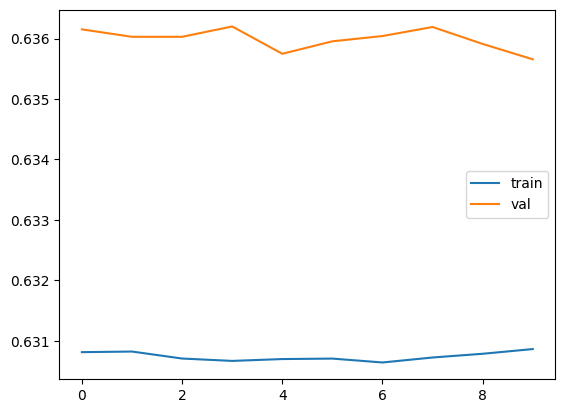

In [56]:
import matplotlib.pyplot as plt

plt.plot(history["loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.legend()
plt.show()

In [57]:
# from sklearn.metrics import ConfusionMatrixDisplay

# custom_model = custom_model.to(device) 

# loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), device=device)
# X_test, y_test = next(iter(loader))

# X_test = X_test.to(device)
# y_test = y_test.to(device)

# y_pred = custom_model.predict(X_test, device=device)

# ConfusionMatrixDisplay.from_predictions(y_test.cpu(), y_pred.argmax(-1), display_labels=dataset.classes)
# plt.xticks(rotation=90)
# plt.plot()

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

custom_model = custom_model.to("cpu")  # відключаємо від gpu

loader = torch.utils.data.DataLoader(test_data, batch_size=32, device="cpu")
X_test, y_test = next(iter(loader))

y_pred = custom_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred.argmax(-1), display_labels=dataset.classes)
plt.xticks(rotation=90)
plt.plot()


TypeError: DataLoader.__init__() got an unexpected keyword argument 'device'

In [58]:
test_data

In [59]:
# model = model.to("cpu") 
# model.eval()
# loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data))
# X_test, y_test = next(iter(loader))

# X_test = X_test.to("cpu")
# y_test = y_test.to("cpu")


# y_pred = custom_model.predict(X_test)

# ConfusionMatrixDisplay.from_predictions(y_test, y_pred.argmax(-1))
# plt.xticks(rotation=90)
# plt.plot()